In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.

In [7]:
path = "/home/andres/Desktop/Trabajo Practico/train.csv"
df = pd.read_csv(path, index_col='id', parse_dates=['fecha'])

In [8]:
df.loc[df['tipodepropiedad'] == 'Casa en condominio', 'tipodepropiedad'] = 'Casa'
df.loc[df['tipodepropiedad'] == 'Casa uso de suelo', 'tipodepropiedad'] = 'Casa'
df = df[df['tipodepropiedad'] == 'Casa'].copy()
df = df[df['provincia'] == 'Distrito Federal'].copy()

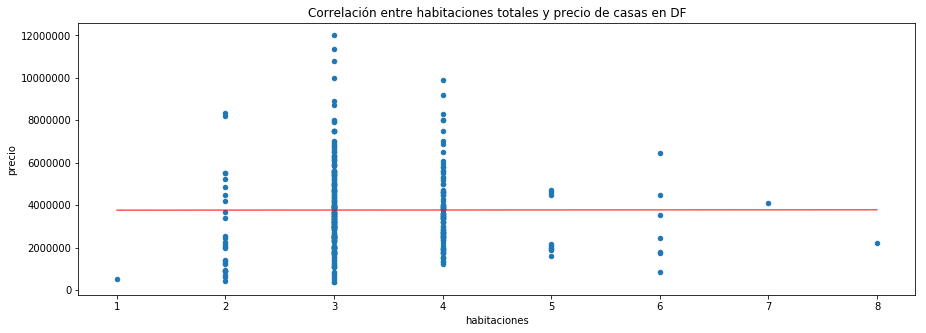

In [9]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'habitaciones'

# Scatter plot
df_sample = df.sample(frac=0.05).copy().dropna().sort_values(column)
df_sample.plot.scatter(x=column, y='precio', figsize=(15, 5), title="Correlación entre habitaciones totales y precio de casas en DF")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = df_sample[column]
y = df_sample['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=1);

In [10]:
#import calendar
#df2 = df.copy()
#df2 = df2.loc[(df2['fecha'] < '2016-12')]
#df2['fecha'] = df2['fecha'].dt.month
#listaDeMeses = list(calendar.month_abbr)
#listaDeMeses.pop(0)
#g = df2['fecha'].value_counts().sort_index().plot(kind='bar',figsize=(15, 5))
#g.set_xticklabels(listaDeMeses,rotation=90);
#df2['fecha'].value_counts()

Text(0.5, 1.0, 'Heatmap de Publicaciones Por Mes y Anio')

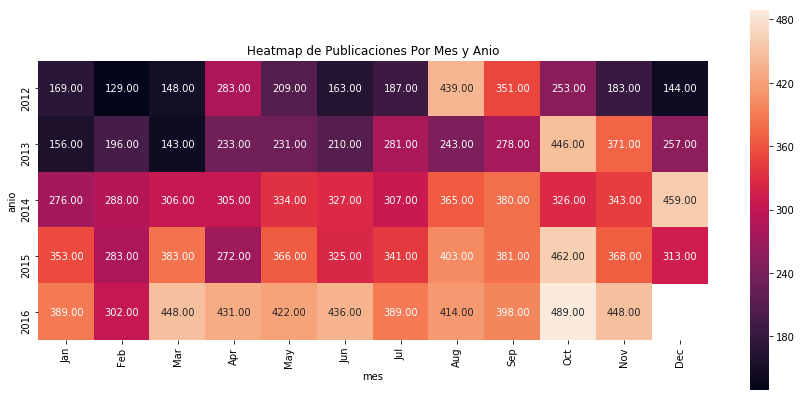

In [11]:
import calendar
df2 = df.copy()
df2 = df2.loc[(df2['fecha'] < '2016-12')]
df2['anio'] = df2['fecha'].dt.year
df2['mes'] = df2['fecha'].dt.month
df2['aux'] = 1
listaDeMeses = list(calendar.month_abbr)
listaDeMeses.pop(0)
grupo = df2.groupby(['anio','mes'])['aux']
plt.figure(figsize=(15, 7))
g = sns.heatmap(grupo.count().unstack(), square=True, annot=True, fmt='.2f')
g.set_xticklabels(listaDeMeses,rotation=90);
g.set_title('Heatmap de Publicaciones Por Mes y Anio')

In [12]:
df2 = df.copy()

In [13]:
df2['contienePrecio'] = df2['descripcion'].str.contains('precio')
df2['contieneVista'] = df2['descripcion'].str.contains('vista')
df2['contieneUbicacion'] = df2['descripcion'].str.contains('ubicacion|zona|ubicación',regex=True)
df2['contieneTamanio'] = df2['descripcion'].str.contains('tamaño|espacio|tamano|tamanio',regex=True)

In [14]:
df2['contieneTamanio'].value_counts()

False    16413
True      4108
Name: contieneTamanio, dtype: int64

In [15]:
def llenarDiccionario(diccionario,descripcion):
    for palabra in descripcion.split():
        palabra = palabra.replace(',','').strip()
        diccionario[palabra] = diccionario.get(palabra,0) + 1
        
def generarDiccionario(df2):
    dicc = {}
    for descripcion in df2['descripcion']:
        if isinstance(descripcion,str): llenarDiccionario(dicc,descripcion)
    return dicc

def limpiarDiccionario(dicc):
    stringDeAdjetivos = urllib.request.urlopen('https://www.solosequenosenada.com/gramatica/spanish/listado/lista_01_adjetivos.php').read().decode("cp1251")
    palabrasARemover = []
    palabrasAIgnorar = ['principal','cuarto','medio','amplia','amplios','completos','trasero','horizontal','comercial']
    for palabra in dicc.keys():
        if len(palabra) <= 3 or palabra in palabrasAIgnorar or (not ('\n'+palabra+' ') in stringDeAdjetivos): palabrasARemover.append(palabra)
    for palabra in palabrasARemover:
        dicc.pop(palabra)
            

15 PALABRAS MAS USADAS EN LA DESCRIPCION DE PROPIEDADES


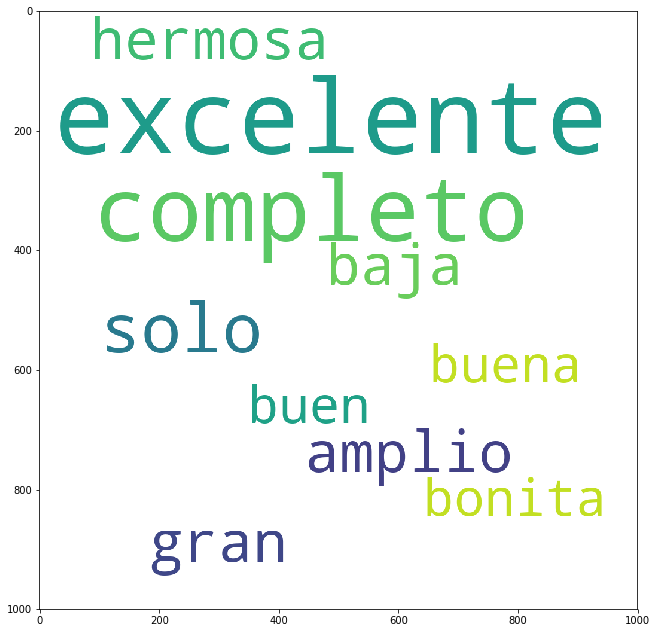

In [17]:
from PIL import Image
from wordcloud import WordCloud
import urllib
dicc = generarDiccionario(df2)
limpiarDiccionario(dicc)
print("15 PALABRAS MAS USADAS EN LA DESCRIPCION DE PROPIEDADES")
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=True).generate_from_frequencies(dicc)
plt.figure(figsize=(11, 11))
plt.imshow(wc)

In [ ]:
df.sample(4)

In [20]:
path = "/home/andres/Desktop/Trabajo Practico/train.csv"
df3 = pd.read_csv(path, index_col='id', parse_dates=['fecha'])

In [19]:
df3.head(5)

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,80.00,80.00,23533.00,nan,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,2273000.00
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,268.00,180.00,24514.00,19.31,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,3600000.00
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,144.00,166.00,48551.00,nan,nan,2015-10-17,0.00,0.00,0.00,0.00,0.00,1200000.00
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,63.00,67.00,53666.00,19.30,-99.69,2012-03-09,0.00,0.00,0.00,1.00,1.00,650000.00
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,95.00,95.00,47835.00,nan,nan,2016-06-07,0.00,0.00,0.00,0.00,0.00,1150000.00


In [28]:
df3['aux'] = 1
group = df3.groupby('provincia')['aux']
df4 = group.count().reset_index()
df4.head()

,provincia,aux
0,Aguascalientes,1753
1,Baja California Norte,3220
2,Baja California Sur,1700
3,Campeche,263
4,Chiapas,1126


In [35]:
import geopandas as gpd
geoframe = gpd.read_file("/home/andres/Desktop/mexEstados")

In [36]:
geoframe.sample(5)

,CODIGO,ESTADO,geometry
27,MX32,Zacatecas,"POLYGON ((-101.52490234375 21.85663986206055, ..."
6,MX22,Querétaro,"POLYGON ((-100.122802734375 19.93803977966309,..."
2,MX18,Nayarit,(POLYGON ((-106.6210784912109 21.5653114318847...
5,MX11,Guanajuato,POLYGON ((-100.2802963256836 20.20450973510742...
29,MX19,Nuevo León,POLYGON ((-99.71816253662109 27.66585731506348...


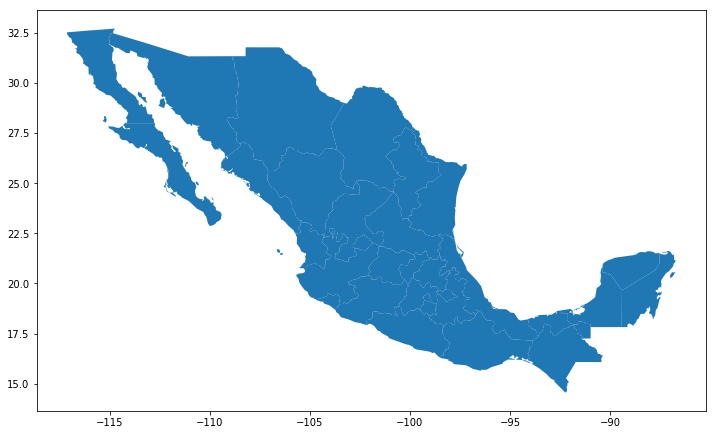

In [38]:
geoframe.plot(figsize=(12,12))

In [40]:
merge = geoframe.merge(df4,left_on='ESTADO',right_on='provincia')

In [41]:
merge.head()

,CODIGO,ESTADO,geometry,provincia,aux
0,MX03,Baja California Sur,(POLYGON ((-111.2061233520508 25.8027763366699...,Baja California Sur,1700
1,MX18,Nayarit,(POLYGON ((-106.6210784912109 21.5653114318847...,Nayarit,1352
2,MX14,Jalisco,"POLYGON ((-101.52490234375 21.85663986206055, ...",Jalisco,21238
3,MX01,Aguascalientes,POLYGON ((-101.8461990356445 22.01176071166992...,Aguascalientes,1753
4,MX11,Guanajuato,POLYGON ((-100.2802963256836 20.20450973510742...,Guanajuato,2860


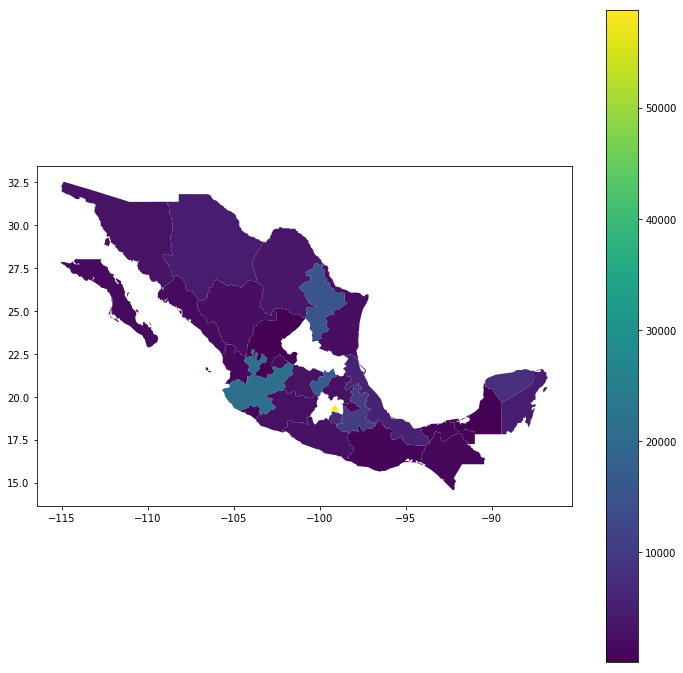

In [66]:
geoplot = merge.plot(figsize=(12,12),column='aux',legend=True,cmap='viridis')
#for location,label in zip(merge.geometry, merge.ESTADO):
    #geoplot.annotate(label, xy=(1,1),xycoords=location, xytext=(3, 3), textcoords="offset points")
#plt.show()

In [85]:
df5 = pd.read_csv('/home/andres/Desktop/ubicaciones.txt')
df5.head()

,Ciudad,ESTADO,Latitud,Longitud
0,Ciudad Juarez,Chihuahua,31.74,-106.49
1,Leon,Guanajuato,21.12,-101.68
2,Ecatepec,State of Mexico,19.61,-99.06
3,Puebla,Puebla State,19.03,-98.18
4,Paraíso,Tabasco,18.40,-93.21


In [86]:
merge2 = merge.merge(df5,on="ESTADO")
merge2.head()

,CODIGO,ESTADO,geometry,provincia,aux,Ciudad,Latitud,Longitud
0,MX03,Baja California Sur,(POLYGON ((-111.2061233520508 25.8027763366699...,Baja California Sur,1700,San José del Cabo,23.06,-109.70
1,MX11,Guanajuato,POLYGON ((-100.2802963256836 20.20450973510742...,Guanajuato,2860,Leon,21.12,-101.68
2,MX27,Tabasco,POLYGON ((-93.58940124511719 17.37545967102051...,Tabasco,994,Paraíso,18.40,-93.21
3,MX06,Chihuahua,POLYGON ((-108.4712982177734 26.96133041381836...,Chihuahua,4590,Ciudad Juarez,31.74,-106.49
4,MX25,Sinaloa,"POLYGON ((-105.402099609375 23.06745910644531,...",Sinaloa,1806,Mazatlan,23.25,-106.41


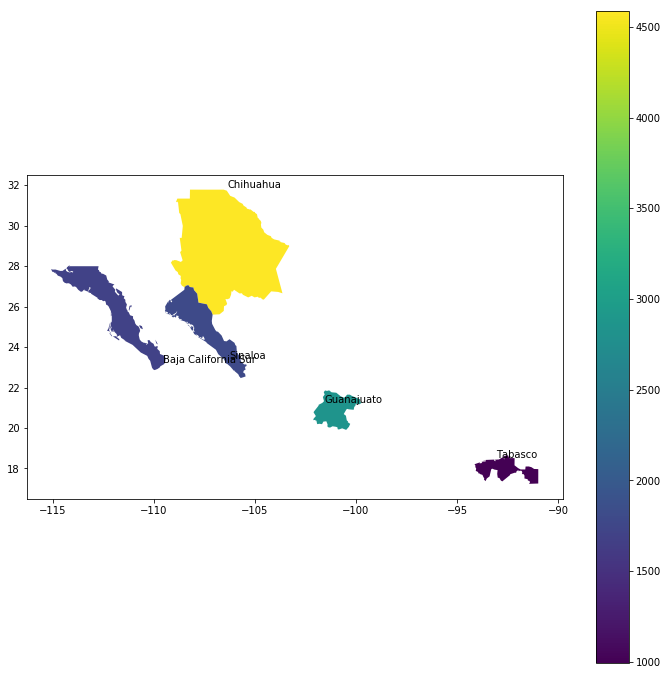

In [90]:
geoplot2 = merge2.plot(figsize=(12,12),column='aux',legend=True,cmap='viridis')
for longitud,latitud,label in zip(merge2.Longitud,merge2.Latitud, merge2.ESTADO):
    geoplot2.annotate(label, xy=(longitud,latitud), xytext=(3, 3), textcoords="offset points")
plt.show()